In [65]:
# Dependencies
from torch.utils import data
import torchvision
import torchvision.transforms as transforms

import numpy as np

In [66]:
scale: float = 0.5
batch_size: int = 32

In [67]:
test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

# noinspection PyArgumentEqualDefault
train_transform = transforms.Compose(
    [
        transforms.RandomCrop(size=32),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomApply([
                transforms.ColorJitter(brightness=0.8*scale, contrast=0.8*scale, saturation=0.8*scale, hue=0.2*scale)
            ], p=0.2
        ),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

In [68]:
# noinspection pyArgumentEqualDefault,PyArgumentEqualDefault,PyArgumentEqualDefault
cifar_train = torchvision.datasets.CIFAR10(
    root='./data/cifar10/', train=True, transform=train_transform, download=True
)
cifar_test = torchvision.datasets.CIFAR10(
    root='./data/cifar10/', train=False, transform=test_transform, download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [69]:
# noinspection pyArgumentEqualDefault
train_dataloader = data.DataLoader(
    dataset=cifar_train, batch_size=batch_size, num_workers=2, shuffle=True
)
# noinspection pyArgumentEqualDefault,PyArgumentEqualDefault
test_dataloader = data.DataLoader(
    dataset=cifar_test, batch_size=batch_size, num_workers=2, shuffle=False
)

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

In [71]:
train_iterator = iter(train_dataloader)
imgs, labels = train_iterator.next()

In [74]:
def unnormalize(img):
    r"""

    Parameters
    ----------
    img:
        The image by a dataloader where transforms.Normalize() is applied.
        SHAPE: [C, H, W].

    Returns
    -------
    normalized_image (implicit):
        The image in standard format.
        SHAPE: [H, W, C].
    """
    return (((img.numpy() + 1.0)/2.0)*255.0).astype(np.uint8).transpose((1, 2, 0))

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


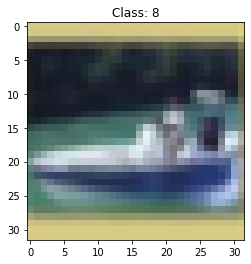

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


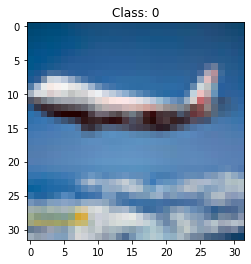

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


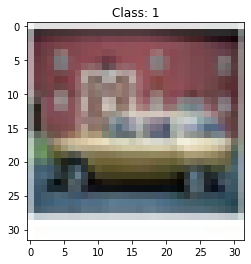

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


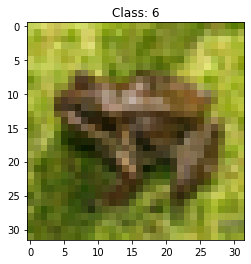

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


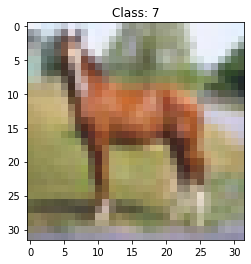

In [75]:
for idx in range(5):
    plt.close()
    fig = plt.figure()
    img = imgs[idx]
    print(imgs.shape, imgs.min(), imgs.max())
    plt.imshow(unnormalize(imgs[idx]))
    plt.title('Class: {}'.format(labels[idx]))
    plt.show()

In [76]:
test_iterator = iter(test_dataloader)
imgs, labels = test_iterator.next()

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


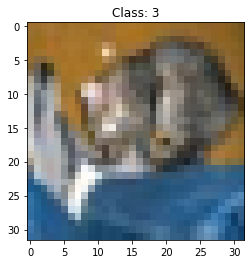

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


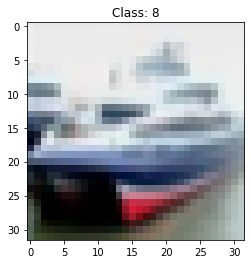

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


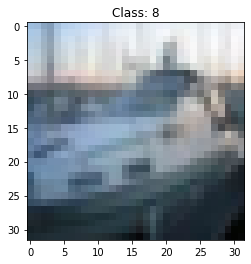

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


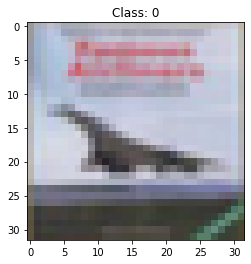

torch.Size([32, 3, 32, 32]) tensor(-1.) tensor(1.)


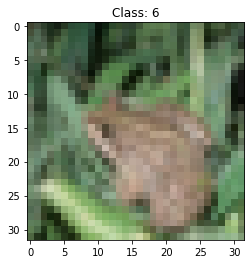

In [77]:
for idx in range(5):
    plt.close()
    fig = plt.figure()
    img = imgs[idx]
    print(imgs.shape, imgs.min(), imgs.max())
    plt.imshow(unnormalize(imgs[idx]))
    plt.title('Class: {}'.format(labels[idx]))
    plt.show()